# Visualisation of the Prediction Depth of CIFAR-10

### - Read output from `get_pd`

In [1]:
import os
import json

def read_pd_files(directory: str) -> tuple[list[str], list[dict]]:
    """
    This function is going to read all .pkl file from a give directory
    @param directory: ..
    @return: ([file name list], [dict list])
    """
    pd_dict_list = []
    file_list = os.listdir(directory)
    pkl_files = [file for file in file_list if file.endswith(".pkl")]

    for pkl_file in pkl_files:
        file_path = os.path.join(directory, pkl_file)
        with open(file_path, "rb") as f:
            dict_load = json.load(f)
            pd_dict_list.append(dict_load)

    return pkl_files, pd_dict_list


pd_result_dir = os.path.join(os.getcwd(), "cl_results_vgg") # change the second argument to specify the result file
file_name_list, pd_dict = read_pd_files(pd_result_dir)

-1


### - Link `pd_dict` with CIFAR dataset

In [19]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.transforms import PILToTensor
import matplotlib.pyplot as plt

class CIFAR10PD(CIFAR10):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super(CIFAR10PD, self).__init__(root, train, transform, target_transform, download)

    def __getitem__(self, index):
        # to get (img, target), index
        img, target = super(CIFAR10PD, self).__getitem__(index)
        return PILToTensor()(img), target, index
trainset = CIFAR10PD('./', train=False, download=True)
testset = CIFAR10PD('./', train=True, download=True)

dataloader_train = DataLoader(trainset, batch_size=1, shuffle=False)
dataloader_test = DataLoader(testset, batch_size=1, shuffle=False)

CIFAR_dict = {}

for imgs, targets, indexes in dataloader_train:
    for imgs, targets, index in zip(imgs, targets, indexes):
        CIFAR_dict[index.item()] = (imgs, targets)
for imgs, targets, indexes in dataloader_test:
    for imgs, targets, index in zip(imgs, targets, indexes):
        CIFAR_dict[index.item()] = (imgs, targets)

Files already downloaded and verified
Files already downloaded and verified


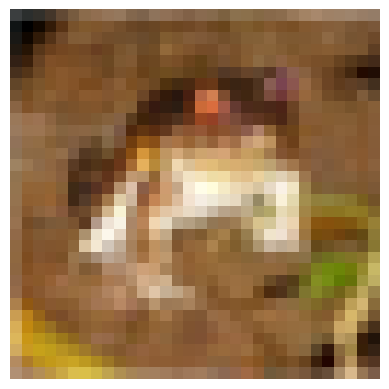

In [21]:
image_np = CIFAR_dict[0][0].numpy()
image_np = image_np.transpose(1, 2, 0)

# Plot the CIFAR-10 image
plt.imshow(image_np)
plt.axis('off')
plt.show()